In [17]:
####Import depedencies...
import numpy as np
import pandas as pa
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
train = pa.read_csv("./train.csv")
test =pa.read_csv("./test.csv")

print(f"train shape  : {train.shape} \ntest shape  : {test.shape}")


train shape  : (79853, 13) 
test shape  : (34224, 12)


In [19]:
#### List of columns in train and test
train_columns=list(train.columns)
test_columns=list(test.columns)

In [20]:
##### Check any different columns are present
np.setdiff1d(test_columns,train_columns)

array([],
      dtype='<U32')

In [21]:
print(train_columns)

['id', 'perc_premium_paid_by_cash_credit', 'age_in_days', 'Income', 'Count_3-6_months_late', 'Count_6-12_months_late', 'Count_more_than_12_months_late', 'application_underwriting_score', 'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type', 'premium', 'renewal']


In [22]:
#### combining the train and test
test.renewal = 'NULL'

In [24]:
total_data=pa.concat([train,test],axis=0)

In [25]:
print(f"shape of total data : {total_data.shape}")

shape of total data : (114077, 13)


In [28]:
##### Check whether the Problem has imbalanced classification or have good percentage of both the positive and negitive classes.

train.renewal.value_counts()

1    74855
0     4998
Name: renewal, dtype: int64

In [34]:
### percentage of postive and negative in train data.

total=74855+4998
positive_percent = (74855/total)*100
negative_percent = (4998/total)*100
print(f"positive_percent : {positive_percent}\nnegative_percent : {negative_percent}\nso accuracy is not the best measure for the performance of the model.")


positive_percent : 93.74099908582019
negative_percent : 6.259000914179805
so accuracy is not the best measure for the performance of the model.


In [36]:
#### check data types

print(train.dtypes)

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
premium                               int64
renewal                               int64
dtype: object


In [42]:
(total_data.isnull()).sum().reset_index()

,index,0
0,Count_3-6_months_late,128
1,Count_6-12_months_late,128
2,Count_more_than_12_months_late,128
3,Income,0
4,age_in_days,0
5,application_underwriting_score,4297
6,id,0
7,no_of_premiums_paid,0
8,perc_premium_paid_by_cash_credit,0
9,premium,0


In [55]:
total_data['Count_3-6_months_late']=total_data['Count_3-6_months_late'].fillna(0)

In [59]:
total_data['Count_6-12_months_late']=total_data['Count_6-12_months_late'].fillna(0)
total_data['Count_more_than_12_months_late']=total_data['Count_more_than_12_months_late'].fillna(0)

In [62]:
total_data.isnull().sum()

Count_3-6_months_late                   0
Count_6-12_months_late                  0
Count_more_than_12_months_late          0
Income                                  0
age_in_days                             0
application_underwriting_score       4297
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
residence_area_type                     0
sourcing_channel                        0
dtype: int64

In [64]:
### According to info of column in problem stmt.
### Underwriting score for an application will not be under 90. If it is under 90 then that application is not insured.
total_data.application_underwriting_score.describe()

count    109780.000000
mean         99.065675
std           0.740743
min          91.900000
25%          98.810000
50%          99.210000
75%          99.530000
max          99.890000
Name: application_underwriting_score, dtype: float64

In [69]:
#### imputing with mean.

total_data.application_underwriting_score=total_data.application_underwriting_score.fillna(np.nanmean(total_data.application_underwriting_score))

In [161]:
total_data.isnull().sum()

Count_3-6_months_late                   0
Count_6-12_months_late                  0
Count_more_than_12_months_late          0
Income                                  0
age_in_days                             0
application_underwriting_score          0
id                                      0
no_of_premiums_paid                     0
perc_premium_paid_by_cash_credit        0
premium                                 0
renewal                             34224
sourcing_channel                        0
rural                                   0
dtype: int64

In [87]:
#### one hot encoding the column "residence_area_type"

total_data['rural']=pa.get_dummies(total_data.residence_area_type)['Rural']

del total_data['residence_area_type']

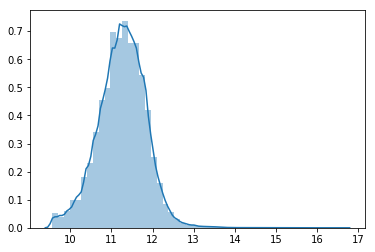

In [120]:
#### Normalization of my variable so that it is approximately Normally distributed.
#### Lets use BOX COX transformation technique to normalize.

from scipy import stats as stats
### first find the maximum lambda value and use it for the normalization.
lambda_max = stats.boxcox_normmax(total_data.Income,brack=(-5,5),method="mle")
### NOrmalization.
income=stats.boxcox(total_data.Income,lambda_max)
sns.distplot(income)
plt.show()

In [122]:
total_data.Income=income

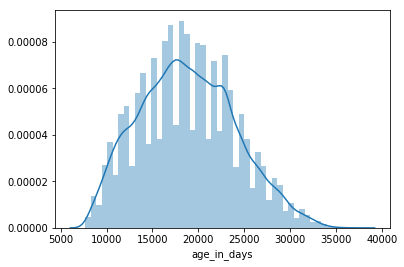

In [132]:
#### age in days.
sns.distplot(total_data.age_in_days)
plt.show()

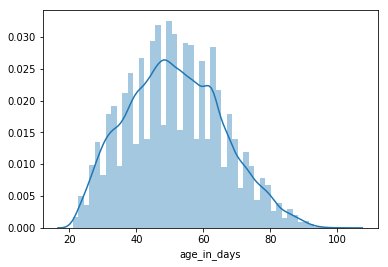

In [131]:
#### Convert days to years. divide by 365. Here im not considering the leap year since it comes once in 4 years.
sns.distplot(round(total_data.age_in_days/365).apply(int))
plt.show()

In [133]:
total_data.age_in_days = round(total_data.age_in_days/365).apply(int) 

In [136]:
#### the distribution of the data will be same but the scale changes.
#### Also check any outlier in the Age column like more than 100 years
#### Check min and max values.

print(f"minumum_age : {np.min(total_data.age_in_days)} \n maximum_age : {np.max(total_data.age_in_days)}")

#### Dont worry the insured might have taken loan long ago when he was young and renewaling the policy at ageof 103 also. great!!!

minumum_age : 21 
 maximum_age : 103


In [177]:
total_data=pa.concat([total_data,(pa.get_dummies(total_data.sourcing_channel)).iloc[:,0:4]],axis=1)

In [180]:
required_columns=total_data[['Count_3-6_months_late','Count_6-12_months_late','Count_more_than_12_months_late','Income','age_in_days','application_underwriting_score','no_of_premiums_paid','perc_premium_paid_by_cash_credit','premium','renewal','sourcing_channel','rural','A','B','C','D']]

In [181]:
train_X=required_columns[~required_columns.renewal.isnull()]

In [183]:
train_y=required_columns[~required_columns.renewal.isnull()]['renewal']

In [187]:
test_X=required_columns[required_columns.renewal.isnull()]
del test_X['renewal']

In [ ]:
##### splitting train and validation sets